In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
np.random.seed(0)

In [2]:
N = 100
mu = 0.2
sigma = 1
x = np.random.randn(N) * sigma + mu

In [3]:
# two-sided test
ztest(x)

(2.5648404153513686, 0.01032232684881584)

In [4]:
# two-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)

# 標本平均の期待値はmu, 分散は1/n * sigma**2
# コアテキスト統計学P.153
z = mu_hat / (sigma_hat / np.sqrt(N))

p_right = 1 - norm.cdf(z) # norm.sfも使える
p_left = norm.cdf(-z)
p = p_right + p_left
z, p

(2.564840415351368, 0.010322326848815901)

In [5]:
# one-sided test
ztest(x, alternative='larger')

(2.5648404153513686, 0.00516116342440792)

In [6]:
# one-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat / np.sqrt(N))
p_right = 1 - norm.cdf(z) # norm.sfも使える
z, p_right

(2.564840415351368, 0.005161163424407977)

In [7]:
# null under a different reference value
mu0 = 0.2
ztest(x, value=mu0)

(0.5904283402851699, 0.5549035151647227)

In [8]:
# null under a different reference value
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = (mu_hat - mu0) / (sigma_hat / np.sqrt(N))
p_right = 1 - norm.cdf(z) # norm.sfも使える
p_left = norm.cdf(-z)
p = p_right + p_left
z, p

(0.5904283402851698, 0.5549035151647228)

In [9]:
# two-sample test
N0 = 100
mu0 = 0.2
sigma0 = 1
x0 = np.random.randn(N0) * sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1 = 1
x1 = np.random.randn(N1) * sigma1 + mu1

In [10]:
ztest(x0, x1)

(-1.1234612344369315, 0.2612416557056353)

In [11]:
# two sample implementation
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()
dmu_hat = mu_hat1 - mu_hat0
s2_hat0 = x0.var(ddof=1)
s2_hat1 = x1.var(ddof=1)
s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1 / N1)
z = dmu_hat / s_hat
p_right = 1 - norm.cdf(z) # norm.sfも使える
p_left = norm.cdf(-z)
p = p_right + p_left
z, p

(1.1234612344369315, 0.26124165570563523)

In [12]:
num_tests = 10000
results = np.zeros(num_tests)
ps = np.zeros(num_tests)
for i in range(num_tests):
    x1 = np.random.randn(100)
    x2 = np.random.randn(100)
    z, p = ztest(x1, x2)
    results[i] = (p < 0.05)
    ps[i] = p
print(results.mean())
print(ps.mean())

0.049
0.5022881995031448


In [13]:
#!wget https://lazyprogrammer.me/course_files/titanic_train.csv

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./titanic_train.csv')

In [16]:
df[df['Survived'] == 1].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
survive = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()
died = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

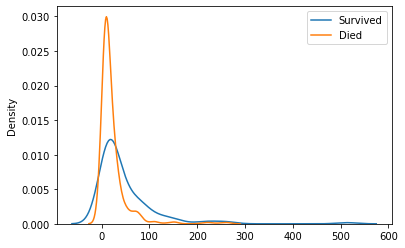

In [18]:
sns.kdeplot(survive, label='Survived')
sns.kdeplot(died, label='Died')
plt.legend()
plt.show()
plt.close()

In [19]:
survive_mean = survive.mean(); died_mean = died.mean()

In [20]:
ztest(survive, died)

(7.939191660871055, 2.035031103573989e-15)

In [21]:
clickdf = pd.read_csv('./advertisement_clicks.csv')

In [22]:
a_cv = clickdf[clickdf['advertisement_id'] == 'A']['action']
b_cv = clickdf[clickdf['advertisement_id'] == 'B']['action']

In [23]:
a_cv.mean(), b_cv.mean()

(0.304, 0.372)

In [24]:
ztest(a_cv, b_cv)

(-3.2211732138019786, 0.0012766696301529544)